In [126]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from mglearn.datasets import make_wave
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import display_pretty

In [127]:
X, y = make_wave(n_samples=100)
lin = np.linspace(-3,3,100,endpoint=False).reshape(-1,1)
print(lin.shape)

(100, 1)


0.6238092976730384


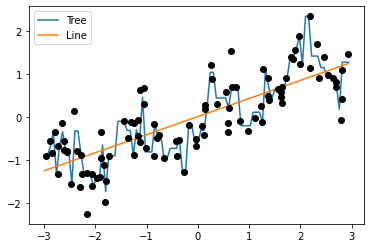

In [128]:
reg = DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(lin, reg.predict(lin).reshape(-1,1), label='Tree')
line = LinearRegression().fit(X,y)
plt.plot(lin,line.predict(lin).reshape(-1,1),label='Line')
plt.plot(X[:,0],y,'o',c='k')
plt.legend(loc='best')
print(line.score(X,y))

In [129]:
bins = np.linspace(-3,3,11)
which_bins = np.digitize(X,bins)
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bins)
X_binned = encoder.transform(which_bins)
print(X_binned[:5])
print(X_binned.shape)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
(100, 10)


0.7775545547799669


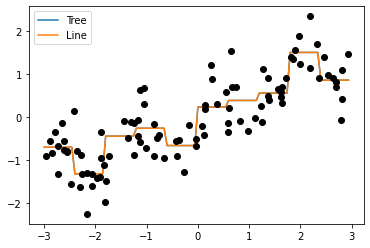

In [130]:
line_binned = encoder.transform(np.digitize(lin,bins))

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(lin, reg.predict(line_binned).reshape(-1,1), label='Tree')
line = LinearRegression().fit(X_binned,y)
plt.plot(lin,line.predict(line_binned).reshape(-1,1),label='Line')
plt.plot(X[:,0],y,'o',c='k')
plt.legend(loc='best')
print(line.score(X_binned,y))

In [131]:
X_combined = np.hstack([X,X_binned])
print(X_combined.shape)
display_pretty(X_combined[:5])

(100, 11)


array([[-0.75275929,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 2.70428584,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 1.39196365,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.59195091,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-2.06388816,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

0.7799596666188021


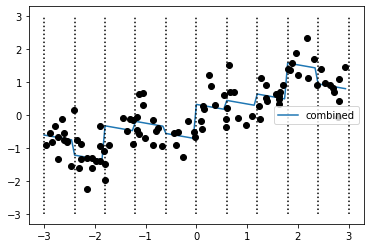

In [132]:
line_combined = np.hstack([lin,line_binned])
reg = LinearRegression().fit(X_combined,y)


plt.plot(lin,reg.predict(line_combined),label='combined')

for bin in bins:
    plt.plot([bin,bin],[-3,3],':',c='k')
plt.legend(loc='best')
plt.plot(X[:,0],y,'o',c='k')
print(reg.score(X_combined,y))

0.8026662200460729


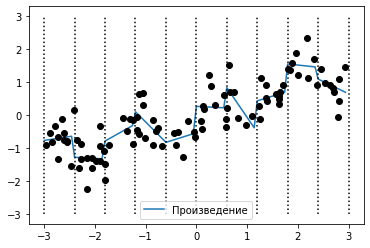

In [133]:
X_product = np.hstack([X_binned,X*X_binned])
line_product = np.hstack([line_binned,lin*line_binned])

reg = LinearRegression().fit(X_product,y)

plt.plot(lin,reg.predict(line_product),label='Произведение')

for bin in bins:
    plt.plot([bin,bin],[-3,3],':',c='k')
plt.legend(loc='best')
plt.plot(X[:,0],y,'o',c='k')
print(reg.score(X_product,y))

0.8143531026987125


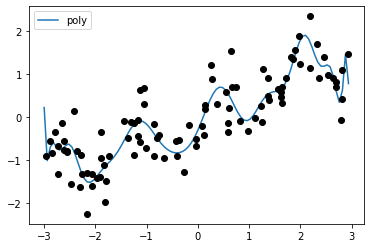

In [145]:
poly = PolynomialFeatures(degree=22,include_bias=False).fit(X)
X_poly = poly.transform(X)
line_poly = poly.transform(lin)

reg = LinearRegression().fit(X_poly,y)

plt.plot(lin,reg.predict(line_poly),label='poly')

plt.legend(loc='best')
plt.plot(X[:,0],y,'o',c='k')
print(reg.score(X_poly,y))